# Example of the aitlas toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the aitlas toolbox.

## Import the required packages

In [2]:
from aitlas.datasets import WHUAerialDataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.transforms import MinMaxNormTranspose

## Visualize images and masks

Total number of patches: 4736


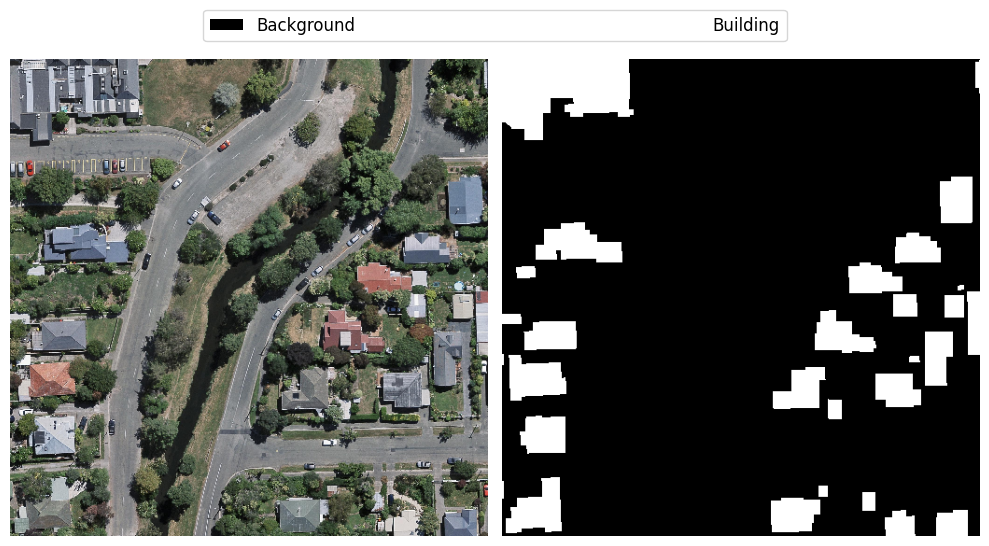

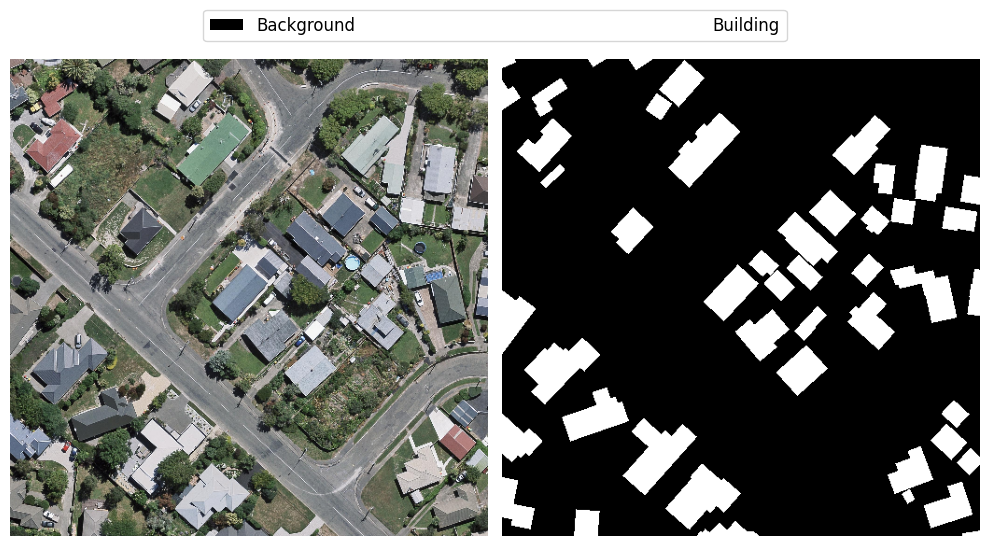

In [2]:
dataset_config = {
    "data_dir": "/home/dragik/data/semseg/buildings/WHUAerial/train/"
}
dataset = WHUAerialDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(1);
dataset.show_image(26);

In [3]:
dataset.data_distribution_table()

,Number of pixels
Background,1.009799e+09
Building,2.317146e+08


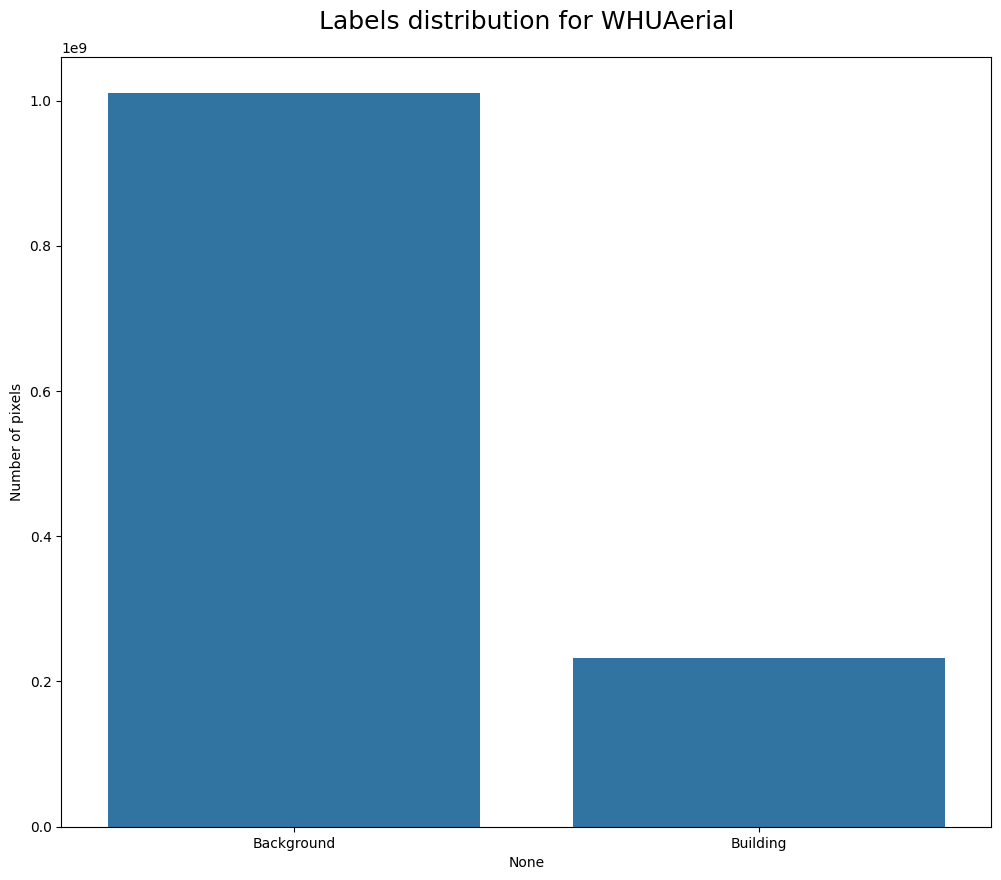

In [4]:
dataset.data_distribution_barchart();

## Load training data ##

In [3]:
train_dataset_config = {
    "batch_size": 8,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/buildings/WHUAerial/train",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = WHUAerialDataset(train_dataset_config)
len(train_dataset)

4736

## Create the model ##

In [4]:
epochs = 5
model_directory = "/home/dragik/data/semseg/buildings/WHUAerial/experiments"
model_config = {
    "num_classes": 2, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training ##

In [5]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2024-04-30 08:31:30,280 INFO Starting training.
2024-04-30 08:31:30.682633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 08:31:31.334435: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
training: 100%|███████████████████████████████████████████████████████████████████████| 592/592 [03:16<00:00,  3.02it/s]
2024-04-30 08:34:48,155 INFO epoch: 1, time: 197, loss:  0.14715
testing on train set: 100%|███████████████████████████████████████████████████████████| 592/592 [00:57<00:00, 10.35it/s]
2024-04-30 08:35:46,903 INFO IOU:0.9415737524973841, IOU mean:0.9069273179524314, IOU per Class:[0.96387785 0.84997678]
training: 100%|███████████████████████████████████████████████████████████████████████| 5

## Evaluate the model ##

In [6]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/buildings/WHUAerial/val",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = WHUAerialDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/semseg/buildings/WHUAerial/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2024-04-30 08:54:56,246 INFO Loading checkpoint /home/dragik/data/semseg/buildings/WHUAerial/experiments/checkpoint.pth.tar
2024-04-30 08:54:56,783 INFO Loaded checkpoint /home/dragik/data/semseg/buildings/WHUAerial/experiments/checkpoint.pth.tar at epoch 6
testing on test set: 100%|████████████████████████████████████████████████████████████| 259/259 [00:14<00:00, 17.84it/s]


[{'IOU': 0.9718937481811817,
  'IOU mean': 0.9313789825996432,
  'IOU per Class': array([0.98412892, 0.87862905])}]

## Predictions ##

2024-04-30 08:55:17,011 INFO Loading checkpoint /home/dragik/data/semseg/buildings/WHUAerial/experiments/checkpoint.pth.tar
2024-04-30 08:55:17,436 INFO Loaded checkpoint /home/dragik/data/semseg/buildings/WHUAerial/experiments/checkpoint.pth.tar at epoch 6


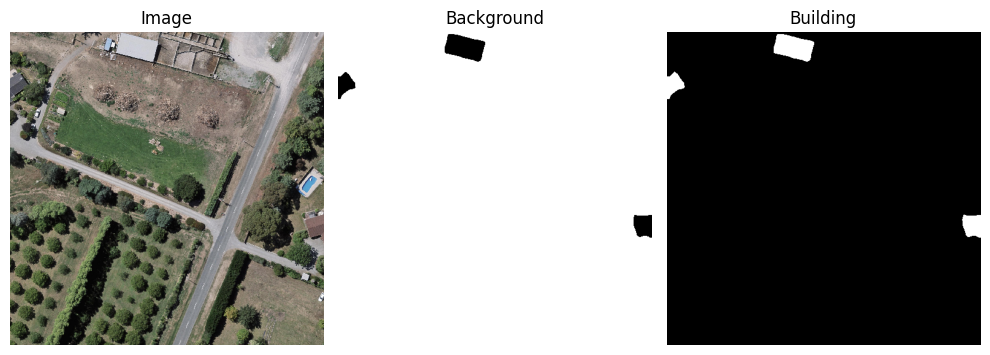

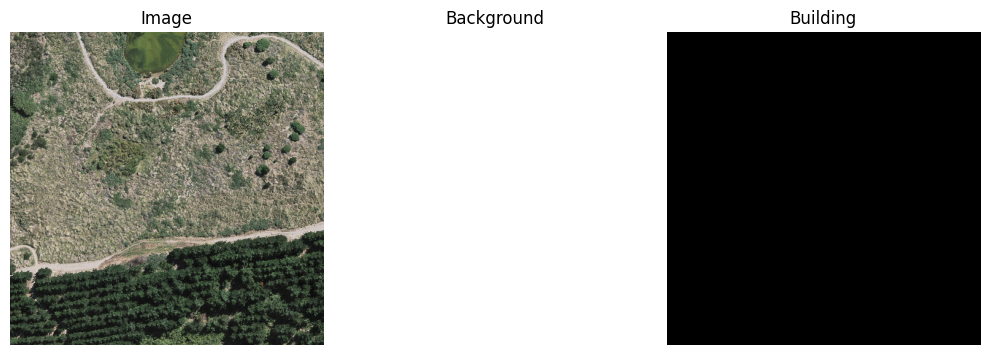

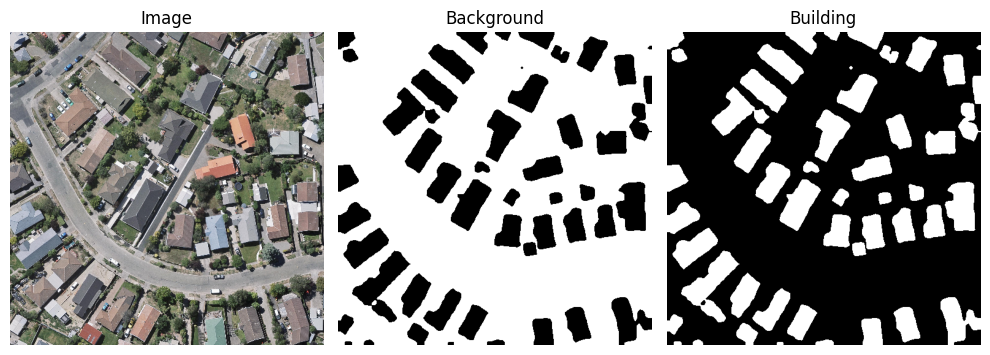

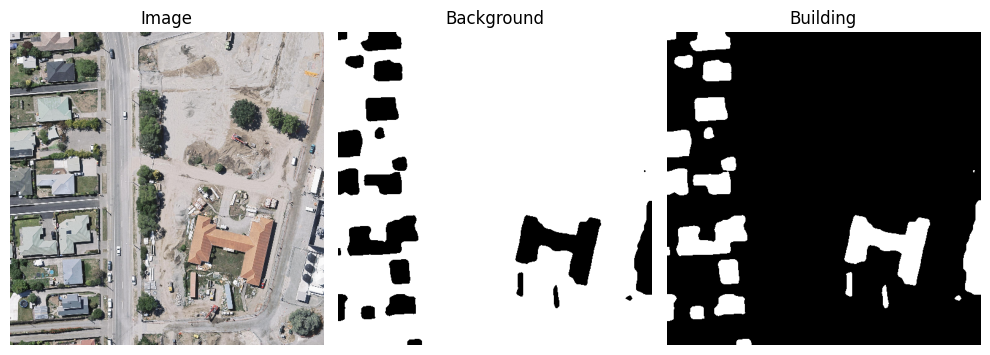

In [7]:
model_path = "/home/dragik/data/semseg/buildings/WHUAerial/experiments/checkpoint.pth.tar"
labels = ["Background","Building"]
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('/home/dragik/data/semseg/buildings/WHUAerial/test/images/2.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/buildings/WHUAerial/test/images/2_43.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/buildings/WHUAerial/test/images/2_103.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/buildings/WHUAerial/test/images/2_163.tif')
fig = model.predict_masks(image, labels, transform)